In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openai
import os
import time
data = pd.read_csv("C:/Users/maira/OneDrive/Desktop/Kaggle Project/train.csv")
openai.api_key = 'API'
questionaire = data
output_file = "C:/Users/maira/OneDrive/Desktop/Kaggle Project/fields.csv"
max_calls_per_min = 3
max_tries=5
model = "gpt-4o-mini"
inputs = []
outputs = []

#Initialize
start_time = time.time()
calls_count = 0

for i, row in questionaire.iterrows():
    print(row)
    '''
    #Wait if calls exceed max_calls_per_min
    calls_count += 1
    if calls_count >= max_calls_per_min:
        current_time = time.time() - start_time
        if current_time < 62:
            time.sleep(62 - current_time)
        start_time = time.time()
        calls_count = 0
    ''' 
    #initialize messages  (Prompt 2)
    messages = []
    system_message = """You are an expert in various scientific fields. For the multiple-choice question provided, identify the most relevant scientific discipline based on the context and content of the question.
                        Possible disciplines include, but are not limited to: Physics, Biology, Astronomy, Chemistry, Earth Science, Environmental Science, Mathematics, and Medicine. 
                        Avoid over-specifying the discipline.
                        Please respond with the name of the most relevant discipline, formatted as a single word or a short phrase."""
    messages.append({"role": "system", "content": system_message})

    #parse question
    user_message = f"""
    Question: {row['prompt']}
    A: {row['A']}
    B: {row['B']}
    C: {row['C']}
    D: {row['D']}
    E: {row['E']}
    Answer(a single word or a short phrase):
    """
    messages.append({"role": "user", "content": user_message})
    #Send message
    for tries in range(max_tries):
        try:
            response = openai.ChatCompletion.create(
                model=model,
                messages=messages)
            break
        except Exception as e:
            print("Error in openai.ChatCompletion.create: ", e," Trying again in 2 minutes. Attempt " + str(tries) + " of " + str(max_tries))
            time.sleep(120)

    #Store outputs
    inputs.append(user_message)
    outputs.append(response["choices"][0]["message"]["content"])

    #Dump outputs
    print("Dumping outputs in", output_file)
    df = pd.DataFrame()
    df["input"] = inputs
    df["fields"] = outputs
    df.to_csv(output_file, index = False)   

c:\Users\maira\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\maira\Anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\maira\Anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


id                                                        0
prompt    Which of the following statements accurately d...
A         MOND is a theory that reduces the observed mis...
B         MOND is a theory that increases the discrepanc...
C         MOND is a theory that explains the missing bar...
D         MOND is a theory that reduces the discrepancy ...
E         MOND is a theory that eliminates the observed ...
answer                                                    D
Name: 0, dtype: object
Dumping outputs in C:/Users/maira/OneDrive/Desktop/Kaggle Project/fields.csv
id                                                        1
prompt    Which of the following is an accurate definiti...
A         Dynamic scaling refers to the evolution of sel...
B         Dynamic scaling refers to the non-evolution of...
C         Dynamic scaling refers to the evolution of sel...
D         Dynamic scaling refers to the non-evolution of...
E         Dynamic scaling refers to the evolution of sel...


39
['Physics' 'History' 'Mathematics' 'Astronomy' 'Quantum Physics'
 'Philosophy' 'Fluid Dynamics' 'Chaos Theory' 'Geometry' 'Anatomy.'
 'Engineering' 'Materials Science.' 'Astrophysics' 'Neuroscience'
 'Materials Science' 'Condensed Matter Physics' 'Meteorology'
 'Nanotechnology' 'Chemistry' 'Statistics' 'Geography' 'Spectroscopy'
 'Quantum Mechanics' 'Genetics' 'Thermodynamics' 'Geology' 'Medicine'
 'Environmental Science' 'Biology' 'Astrochemistry' 'Environment'
 'Microbiology' 'Immunology' 'Particle Physics' 'Energy Science'
 'Metallurgy' 'Space Physics' 'Biophysics' 'Cell Biology']
fields
Physics                     103
Astronomy                    27
Mathematics                   8
Chemistry                     8
Biology                       6
Fluid Dynamics                4
Astrophysics                  4
Chaos Theory                  2
Thermodynamics                2
Medicine                      2
Quantum Physics               2
Condensed Matter Physics      2
Engineering    

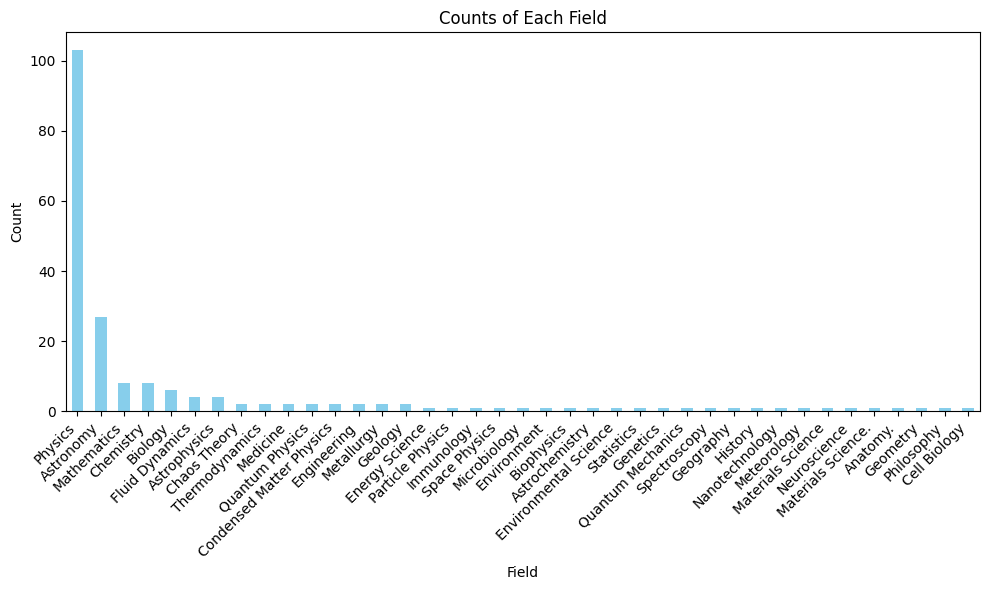

In [2]:
dataframe= pd.read_csv("C:/Users/maira/OneDrive/Desktop/Kaggle Project/fields.csv")
unique_count = dataframe["fields"].nunique()
print(unique_count)
unique_values = dataframe["fields"].unique()
print(unique_values)

# Count the occurrences of each unique value
field_counts = dataframe["fields"].value_counts()
print(field_counts)
# Plot the counts as a bar graph
plt.figure(figsize=(10, 6))
field_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Each Field')
plt.xlabel('Field')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
# Find the indices of samples with the field "Physics"
physics_indices = dataframe.index[dataframe["fields"] == "Physics"].tolist()
# Print the indices
print("Indices of samples with 'Physics':")
print(physics_indices)

Indices of samples with 'Physics':
[0, 1, 3, 4, 5, 7, 10, 15, 18, 19, 21, 22, 23, 24, 30, 32, 35, 36, 38, 40, 43, 44, 45, 46, 48, 52, 53, 55, 57, 59, 64, 65, 66, 68, 69, 70, 71, 74, 75, 78, 79, 80, 81, 85, 86, 87, 88, 89, 90, 91, 92, 93, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 108, 112, 113, 115, 116, 117, 119, 120, 121, 123, 125, 127, 128, 129, 130, 134, 151, 154, 156, 158, 160, 164, 165, 166, 167, 168, 170, 172, 173, 174, 175, 180, 182, 183, 187, 188, 190, 192, 193, 198, 199]


In [4]:
Astronomy_indices = dataframe.index[dataframe["fields"] == "Astronomy"].tolist()
print("Indices of samples with 'Astronomy':")
print(Astronomy_indices)

Indices of samples with 'Astronomy':
[8, 12, 13, 20, 27, 28, 37, 41, 42, 49, 54, 56, 58, 61, 67, 73, 77, 95, 126, 132, 150, 155, 159, 169, 176, 177, 179]


In [7]:
Biology_indices = dataframe.index[dataframe["fields"] == "Biology"].tolist()
print("Indices of samples with 'Biology':")
print(Biology_indices)

Indices of samples with 'Biology':
[139, 145, 146, 147, 148, 184]


In [5]:
Chemistry_indices = dataframe.index[dataframe["fields"] == "Chemistry"].tolist()
print("Indices of samples with 'Chemistry':")
print(Chemistry_indices)

Indices of samples with 'Chemistry':
[72, 83, 122, 136, 143, 153, 162, 171]


In [6]:
Mathematics_indices = dataframe.index[dataframe["fields"] == "Mathematics"].tolist()
print("Indices of samples with 'Mathematiccs':")
print(Mathematics_indices)

Indices of samples with 'Mathematiccs':
[6, 9, 84, 114, 133, 157, 161, 194]


In [11]:
import numpy as np
# Randomly select the required number of indices from each field 
np.random.seed(42)  # For reproducibility
selected_physics_indices = np.random.choice(physics_indices, size=5, replace=False)
selected_Astronomy_indices = np.random.choice(Astronomy_indices, size=2, replace=False)
selected_Biology_indices = np.random.choice(Biology_indices, size=1, replace=False)
selected_Chemistry_indices = np.random.choice(Chemistry_indices, size=1, replace=False)
selected_Mathematics_indices = np.random.choice(Mathematics_indices, size=1, replace=False)

# Combine the selected indices
selected_indices = list(selected_physics_indices) + list(selected_Astronomy_indices) + list(selected_Biology_indices) + list(selected_Chemistry_indices) + list(selected_Mathematics_indices)
print(selected_indices)
# filter those indices from data and save as a csv file
filtered_dataframe = data.loc[selected_indices]
filtered_dataframe.to_csv("C:/Users/maira/OneDrive/Desktop/Kaggle Project/subset_samples.csv", index=False)

[64, 117, 108, 89, 81, 58, 28, 184, 83, 6]


In [12]:
# remove the selected indices from data and save as a csv file
updated_data = data.drop(index=selected_indices)
updated_data.to_csv("C:/Users/maira/OneDrive/Desktop/Kaggle Project/updated_data.csv", index=False)